In [1]:
import data

trainingDB = data.TrainingsetDB()
testDB = data.TestsetDB()

In [2]:
face = trainingDB.getFace(1)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

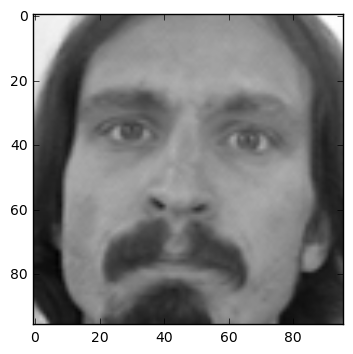

In [4]:
plt.imshow(face.image, cmap = 'gray')

In [6]:
featureImage = face.getFeatureImage(data.RIGHT_EYE_CENTER, (30, 10))

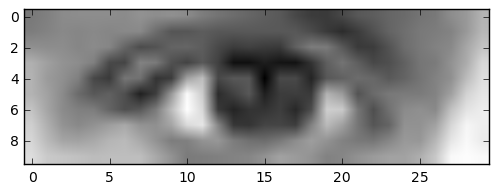

In [7]:
plt.imshow(featureImage, cmap = 'gray')

<function __main__.<lambda>>

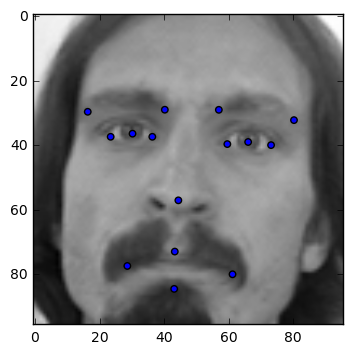

In [8]:
import matplotlib.patches as patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def showFace(face):
    fig,ax = plt.subplots()
    for key, value in face.features.items():
        ax.add_patch(patches.Circle(value,1))
    ax.imshow(face.image, cmap = 'gray')

showTrainingFace = lambda faceId : showFace(trainingDB.getFace(faceId))
interact(showTrainingFace, faceId=widgets.IntSlider(min=1,max=trainingDB.rows(),step=1,value=0))

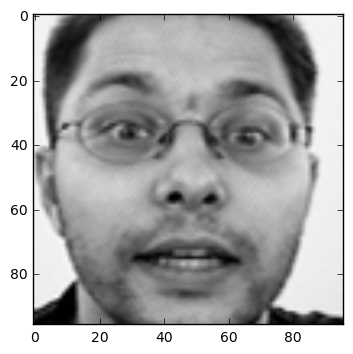

In [9]:
showFace(testDB.getFace(1))

In [10]:
import pandas as pd
means = pd.read_csv('means.csv', index_col='name')

In [12]:
for face in testDB.getFaces():
    for key,value in data.featuresNames.items():
        position = (means['position'][value + '_x'], means['position'][value + '_y'])
        face.setFeaturePosition(key, position)

In [13]:
testDB.write('results/resultMeans.csv')

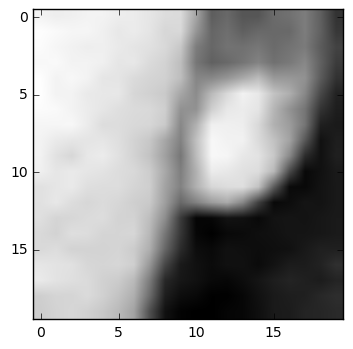

In [15]:
plt.imshow(trainingDB.randomSubImage(1, (20, 20), data.allFeatures), cmap = 'gray')

<function __main__.<lambda>>

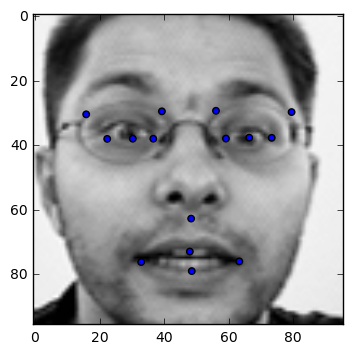

In [16]:
showTestFace = lambda faceId : showFace(testDB.getFace(faceId))
interact(showTestFace, faceId=widgets.IntSlider(min=1,max=testDB.rows(),step=1,value=0))